In [23]:
import os

In [26]:
os.environ['KAGGLE_USERNAME'] = 'mason0908'
os.environ['KAGGLE_KEY'] = 'd6bcff4b46ed3f938f86b1a4d69f1694'

In [27]:
!kaggle datasets download -d vikrishnan/boston-house-prices

boston-house-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!unzip *.*

Archive:  boston-house-prices.zip
replace housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
# import packages
import pandas as pd
import numpy as np

In [30]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
Boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)

보스턴 주택 데이터 세트는 보스턴 MA 지역의 주택과 관련하여 미국 인구 조사국이 수집한 정보에서 파생되었습니다.

다음은 데이터 집합 열에 대해 설명합니다:

1. CRIM - 도시별 1인당 범죄율
2. ZN - 25,000 평방 피트를 초과하는 주택지의 비율
3. INDUS - 도시별 비소매상업지역이 점유하고 있는 토지의 비율
4. CHAS - 찰스강에 대한 더미 변수 (1: 강의 경제권 내 위치, 0: 그 외)
5. NOX - 10 ppm 당 일산화질소 농도
6. RM - 주택 한 가구당 평균 방의 개수
7. AGE - 1940년 이전 건축된 자가 주택 비율
8. DIS - 5개의 보스턴 고용센터와의 평균 거리
9. RAD - 방사형 고속도로 접근성 지수
10. TAX - 10,000 달러당 재산세 비율
11. PTRATIO - 도시별 학생 - 교사 비율
12. B - 1000(Bk - 0.63)^2 (Bk는 도시별 흑인 비율)
13. LSTAT - 사회경제적 지위가 낮은 소득 하위층 비율
14. MEDV - 본인 소유 주택 가격의 중앙값 (1,000 달러 단위)

In [31]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
# Dimension of dataset
np.shape(Boston)

(506, 14)

In [33]:
# Let's summarize the data to see the distribution of data
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


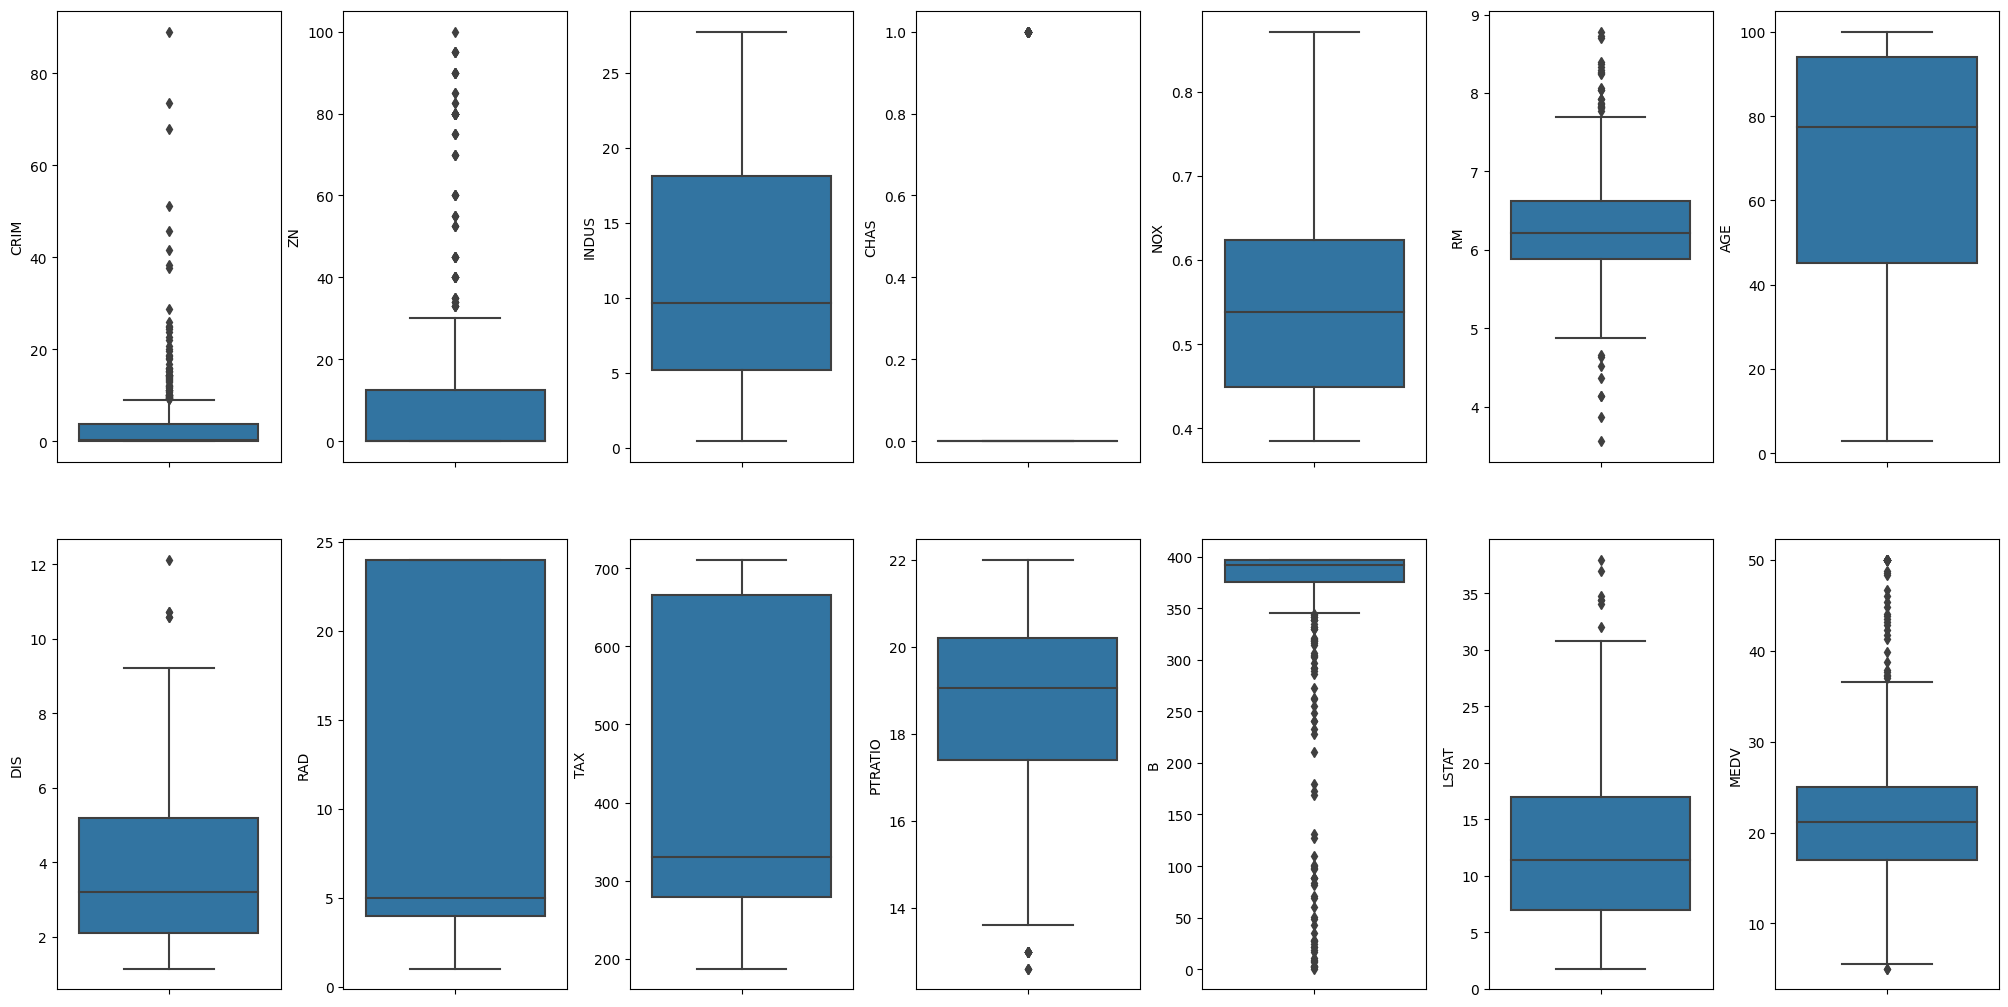

In [34]:
# Check the outliers of dataset
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Plot the boxplot of dataset
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index= 0
axs = axs.flatten()
for k,v in Boston.items():
  sns.boxplot(y=k,data=Boston, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

 CRIM, ZN, RM, B 열이 이상치를 가지고 있는 것으로 확인된다.

모든 열의 이상치 비율을 확인해보자.

In [35]:
# Check the percentages of outliers for each columns
for k,v in Boston.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v<=q1-1.5*irq) | (v>=q3+1.5*irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(Boston)[0]
  print("Colume %s outliers = %.2f%%" % (k,perc))

Colume CRIM outliers = 13.04%
Colume ZN outliers = 13.44%
Colume INDUS outliers = 0.00%
Colume CHAS outliers = 100.00%
Colume NOX outliers = 0.00%
Colume RM outliers = 5.93%
Colume AGE outliers = 0.00%
Colume DIS outliers = 0.99%
Colume RAD outliers = 0.00%
Colume TAX outliers = 0.00%
Colume PTRATIO outliers = 2.96%
Colume B outliers = 15.22%
Colume LSTAT outliers = 1.38%
Colume MEDV outliers = 7.91%


다른 분포들을 그려보기 전에 MEDV의 이상치들을 삭제해보자 (MEDV 50을 기준으로)

In [36]:
# Remove outliers based on MEDV (MEDV >= 50)
revised_Boston=Boston[~(Boston['MEDV']>=50.0)]

다른 특징들과 MEDV (정답)의 분포를 그려보면 다음과 같다.

<ipython-input-37-234f27d85d55>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-37-234f27d85d55>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-37-234f27d85d55>:7: UserWarning: 

`distplot` is a deprecated function and will be 

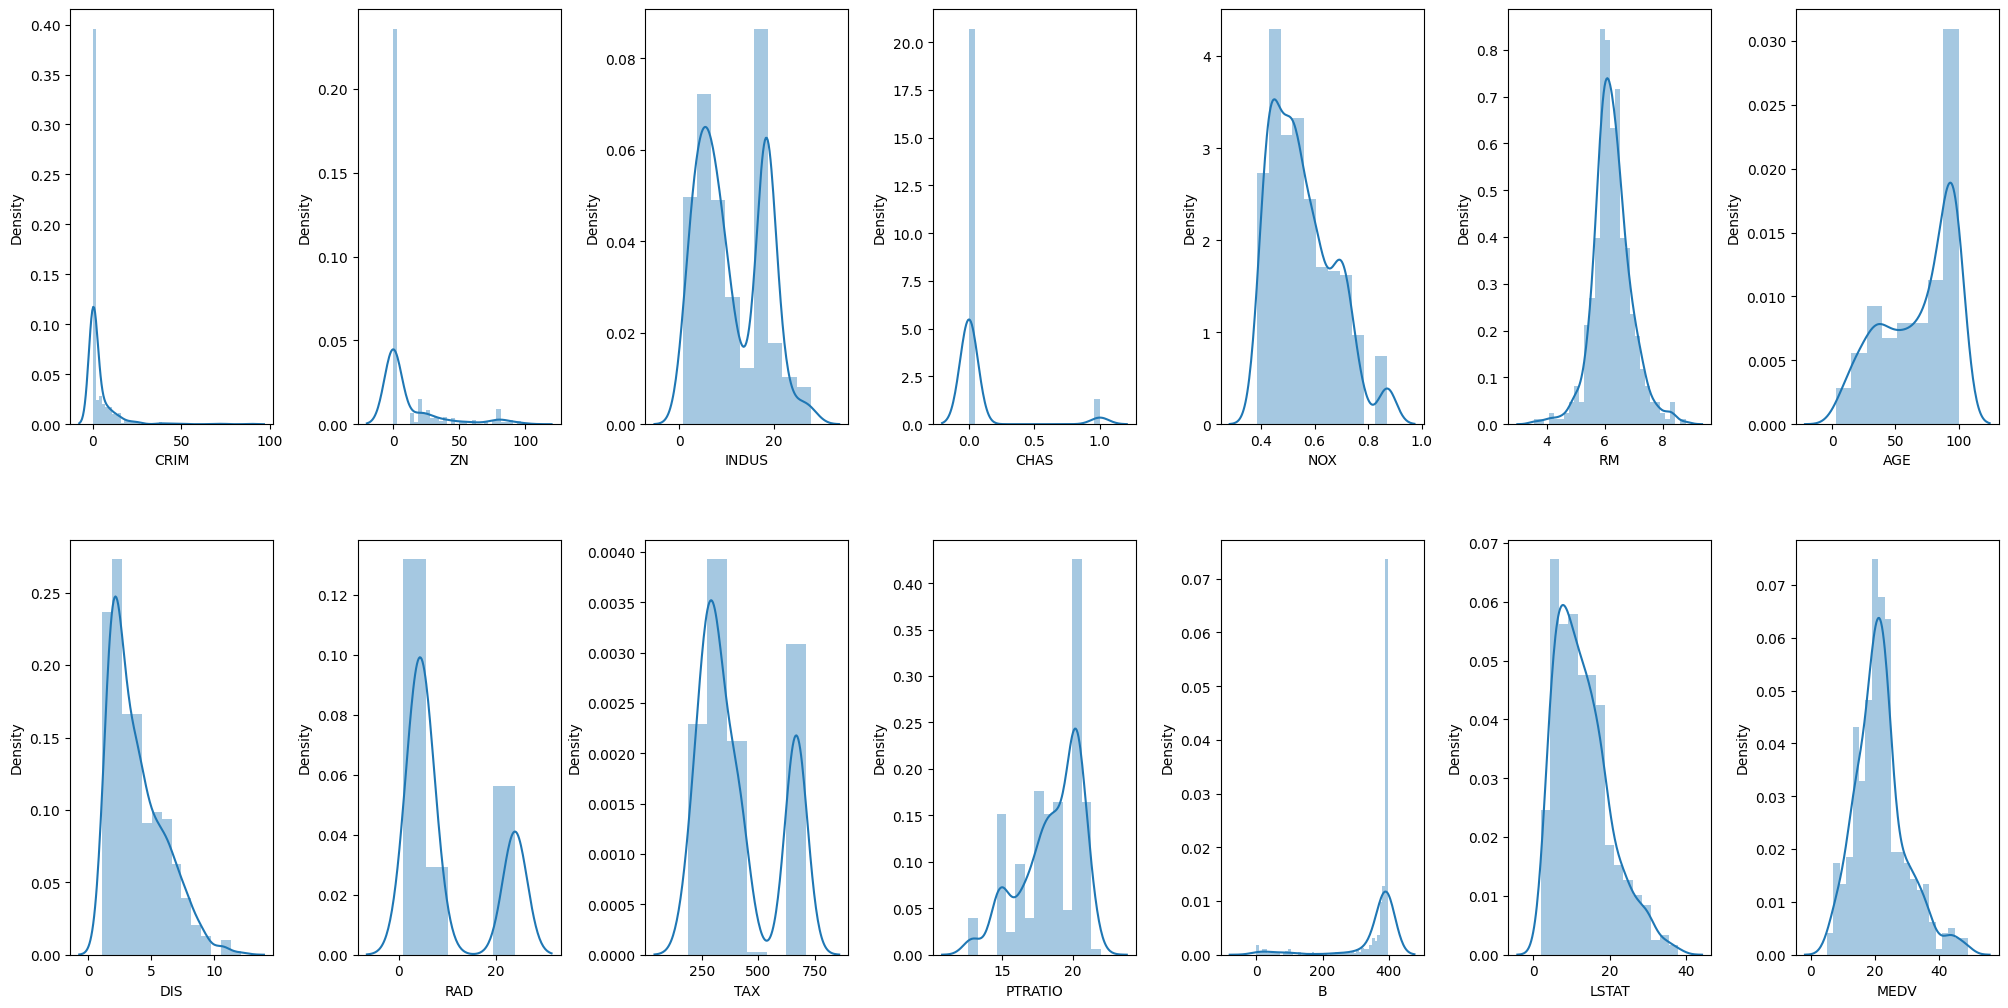

In [37]:
# Plot the distribution of features and label
# We can use 'histplot' instead of 'distplot'
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in revised_Boston.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

히스토그램은 CRIM, ZN, B 열의 비대칭도가 매우 높은 것을 확인할 수 있다. 또한 MEDV 데이터들은 정규분포를 따르는 것으로 보이며, 다른 특징들은 정규분포 또는 다봉분포를 가지는 것으로 보인다. (이산변수인 CHAS를 제외하고)

데이터들의 상관관계를 확인해보자

<Axes: >

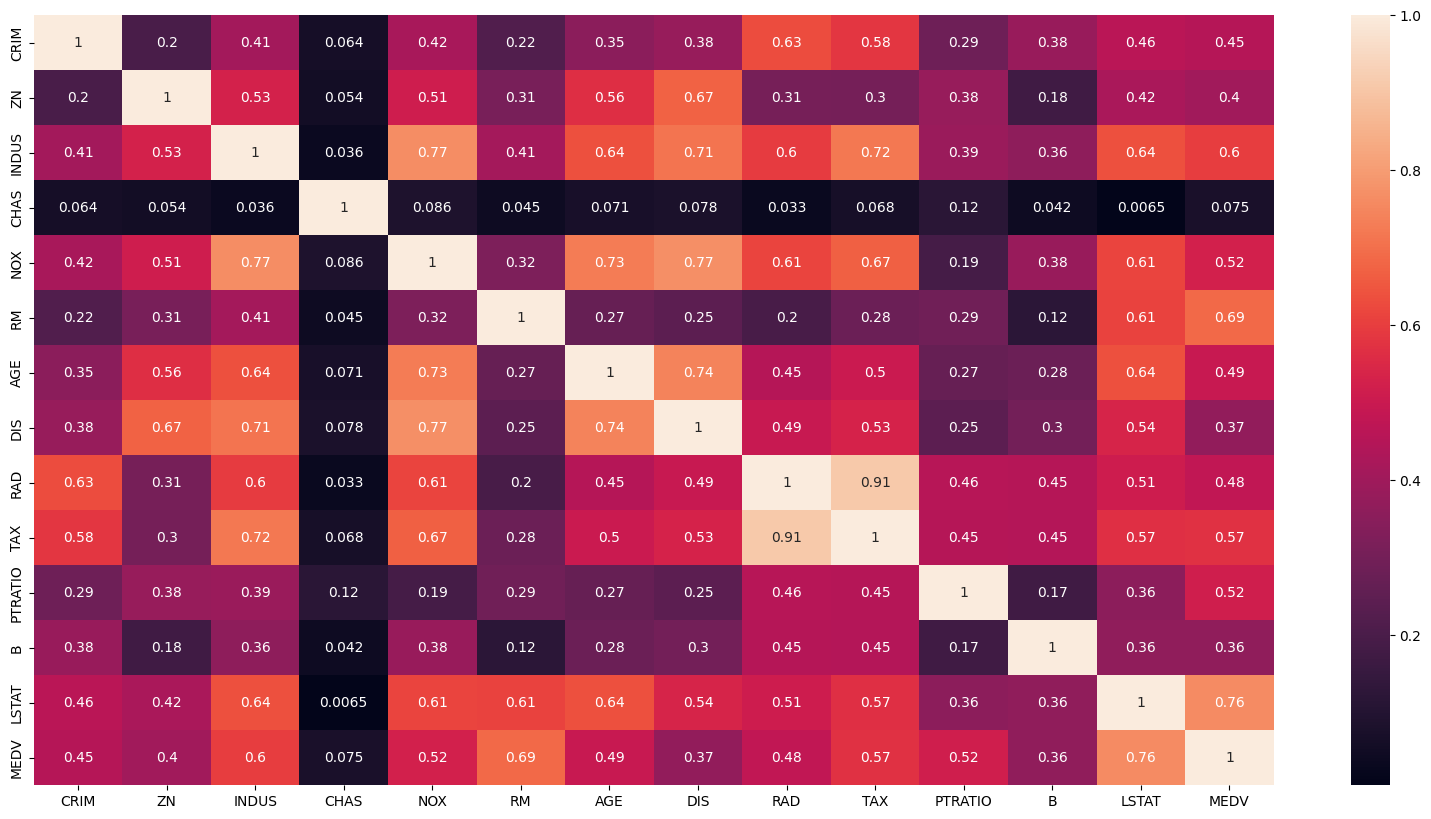

In [38]:
# Plot the correlation of datas
plt.figure(figsize=(20, 10))
sns.heatmap(revised_Boston.corr().abs(),  annot=True)

상관관계 행렬로 부터 우리는 TAX와 RAD 특징들이 높은 상관도를 가지고 있으며, LSTAT, INDUS, RM, TAX, NOX, PTRAIO 특징들이 MEDV와 0.5 이상의 높은 상관도를 가진다는 것을 확인할 수 있다. (예측 변수로 사용하기 좋다)

LSTAT, INDUS, RM, TAX, NOX, PTRAIO 특징들과 MEDV 사이의 관계를 그려보자

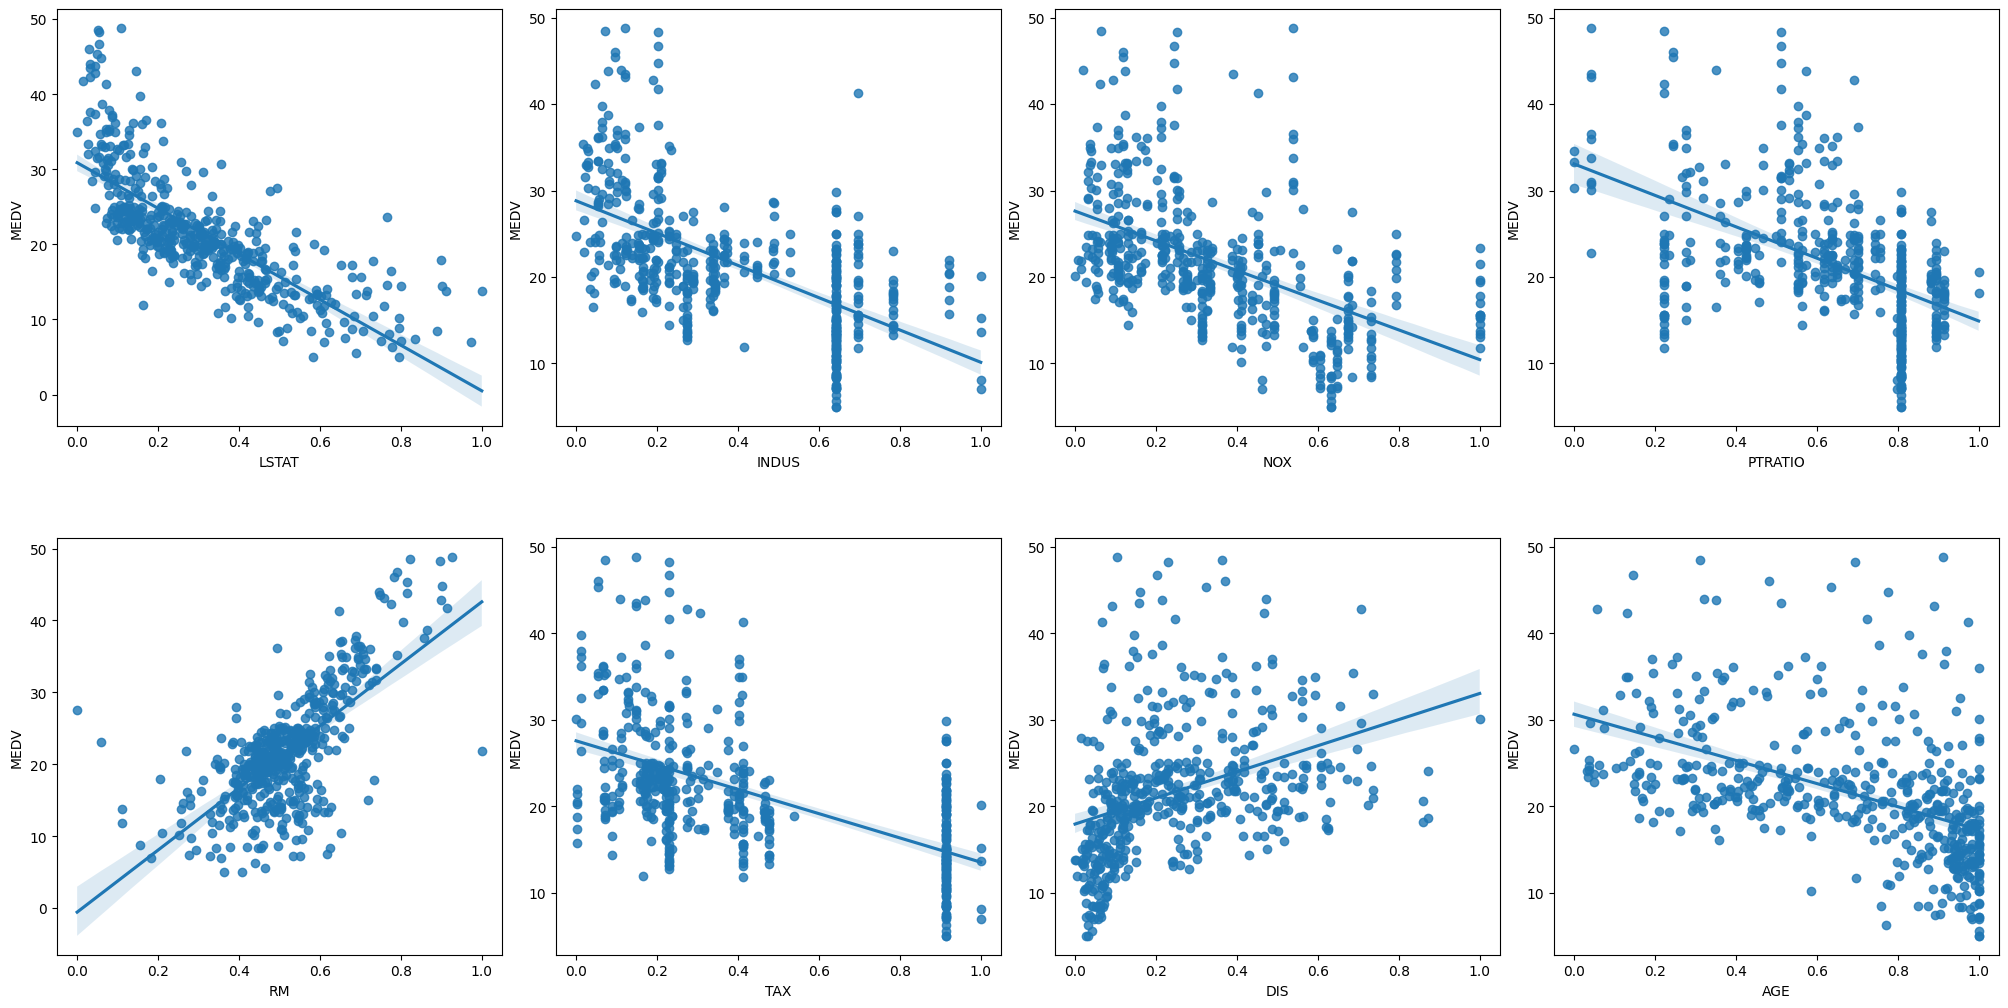

In [39]:
from sklearn import preprocessing

# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

x = revised_Boston.loc[:,column_sels]
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
y = revised_Boston['MEDV']

# Plot the regplot with MEDV and extracted features
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

로그 변환을 통해 데이터의 비대칭도를 제거해보자

In [40]:
# Remove skewness through log transformation
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

Linear Regressor, Ridge Regressior 데이터셋에 적용해보자

In [41]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

l_regression = linear_model.LinearRegression()
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear, MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("Ridge, MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Linear, MSE: -0.04 (+/- 0.04)
Ridge, MSE: -0.04 (+/- 0.04)


Poly Ridge Regressor를 적용해보자

In [42]:
# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

for degree in range(2, 6):
    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    print("Ridge, degree: %d, MSE: %0.2f (+/- %0.2f)" % (degree, scores.mean(), scores.std()))

model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("Polynomial Ridge, MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Ridge, degree: 2, MSE: -0.03 (+/- 0.03)
Ridge, degree: 3, MSE: -0.03 (+/- 0.03)
Ridge, degree: 4, MSE: -0.03 (+/- 0.03)
Ridge, degree: 5, MSE: -0.03 (+/- 0.03)
Polynomial Ridge, MSE: -0.03 (+/- 0.03)


Support Vector Regressor (SVR)을 적용해보자

In [43]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


Decision Tree Regressor를 적용해보자

In [44]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.05 (+/- 0.04)


K-Neighbors Regressor를 적용해보자

In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.04 (+/- 0.02)


다음으로 앙상블 모델인 Gradient Boosting Regressor를 적용해보자

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


Scoremap Boxplot을 그리면 다음과 같다.

<Axes: >

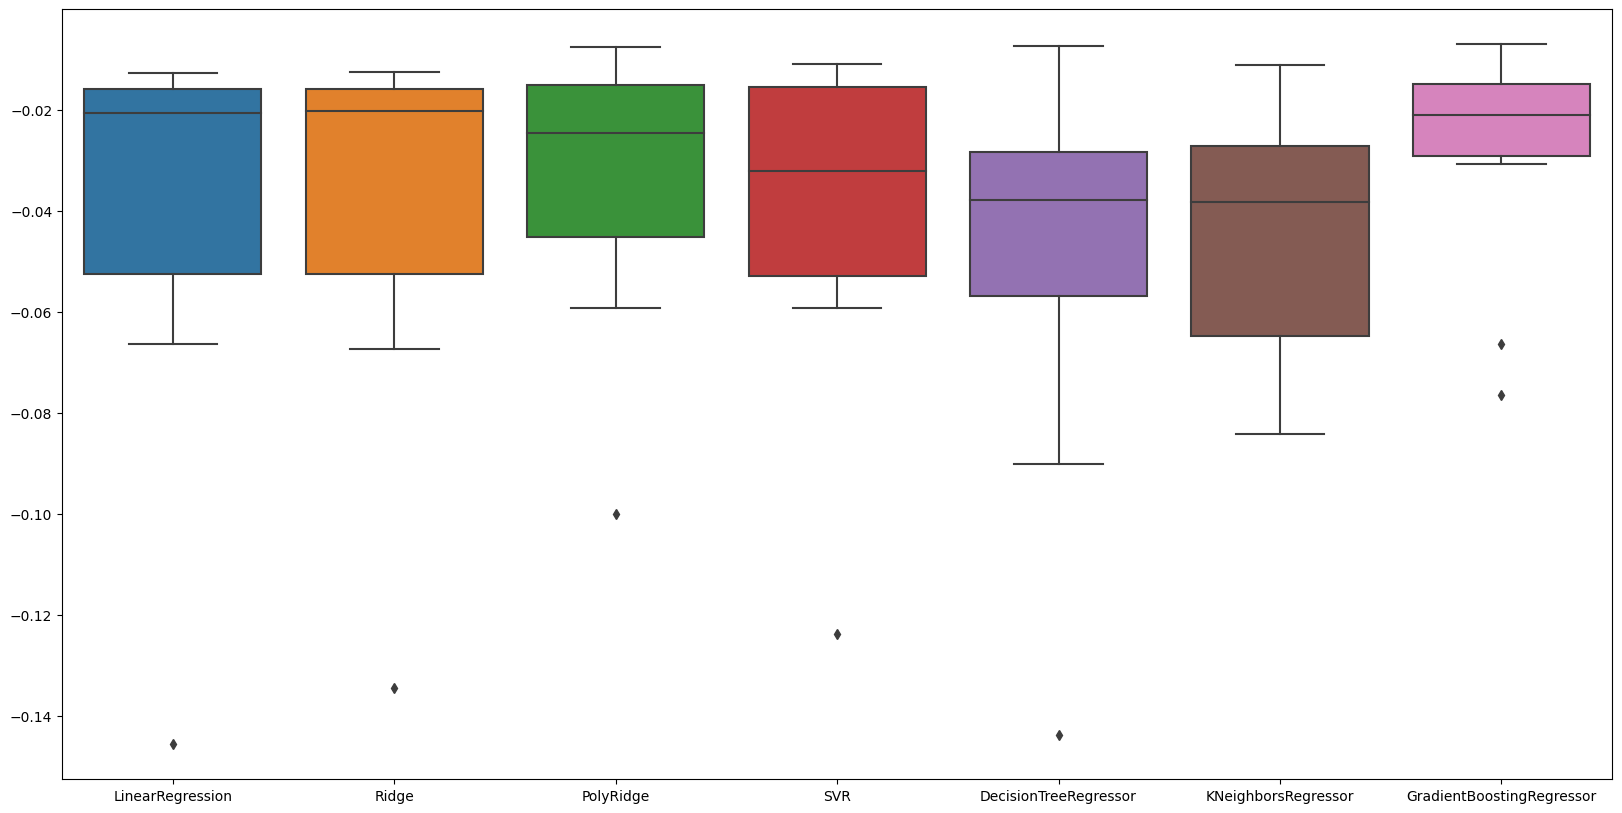

In [47]:
# Plot the boxplot of scoremap
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)